id
0       88.0
1       87.0
2       90.0
3       98.0
4      100.0
       ...  
972     98.0
973     98.0
974     84.0
975     89.0
976     97.0
Name: guest_satisfaction_overall, Length: 977, dtype: float64

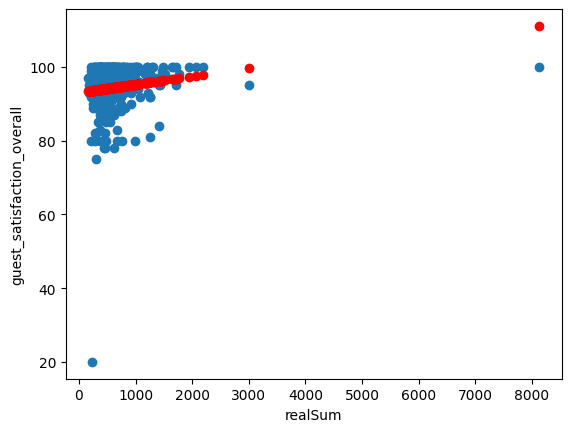

In [11]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

import sys
import gurobipy as gp

from gurobi_ml import add_predictor_constr

import gurobipy_pandas as gppd

# Base URL for retrieving data
# TODO combine weekdays and weekends, add another column true false, if weekend
historical_data = pd.read_csv(
    "csv_dateien/amsterdam_weekends.csv", index_col=0
)
# "id","realSum","room_type","room_shared","room_private","person_capacity","host_is_superhost","multi","biz","cleanliness_rating","guest_satisfaction_overall","bedrooms","dist","metro_dist","attr_index","attr_index_norm","rest_index","rest_index_norm","lng","lat"

features = "realSum"
target = "guest_satisfaction_overall"

# classify our features between the ones that are fixed and the ones that will be
# part of the optimization problem


x = historical_data[features]
y = historical_data[target]

y



x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=23)

x_train = np.array(x_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)

lr = LinearRegression()

lr.fit(x_train, y_train)

c = lr.intercept_
c

m = lr.coef_
m

y_pred_train = m*x_train + c
y_pred_train1 = lr.predict(x_train)

"""
plt.scatter(x_train, y_train)
plt.scatter(x_train, y_pred_train1, color= "red")
plt.xlabel("realSum")
plt.ylabel("guest_satisfaction_overall")

"""

y_pred_test1 = lr.predict(x_test)

plt.scatter(x_test, y_test)
plt.scatter(x_test, y_pred_test1, color= "red")
plt.xlabel("realSum")
plt.ylabel("guest_satisfaction_overall")

y

In [3]:
import tensorflow as tf
import tensorflow.contrib.eager as tfe
from tensorflow import keras
# import pandas as pd

# load file
train_dataset_url = "csv_dateien/amsterdam_weekends.csv"

column_names = ["id","realSum","room_type","room_shared","room_private","person_capacity","host_is_superhost","multi","biz","cleanliness_rating","guest_satisfaction_overall","bedrooms","dist","metro_dist","attr_index","attr_index_norm","rest_index","rest_index_norm","lng","lat"]
feature_names = column_names[:10]+ column_names[11:]
label_name = "guest_satisfaction_overall"

batch_size = 5

train_dataset = tf.contrib.data.make_csv_dataset(

)

# (x_train, y_train), (x_test, y_test) = data



['id',
 'realSum',
 'room_type',
 'room_shared',
 'room_private',
 'person_capacity',
 'host_is_superhost',
 'multi',
 'biz',
 'cleanliness_rating',
 'bedrooms',
 'dist',
 'metro_dist',
 'attr_index',
 'attr_index_norm',
 'rest_index',
 'rest_index_norm',
 'lng',
 'lat']